In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor


# Regression Task:
the task is to make a regression model that could inform whether the car you wanted to buy was good value in relation to the market in general.
The data is UK Used Car Data 

In [2]:
cars_df = pd.read_csv('./audi.csv')

In [3]:
cars_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


# Features explanation

1. model - The model of the Audi car
2. year - The year at which the particular car was sold at
3. price - The price at which the car was sold at
4. mileage - The mileage the car had at the time of selling
5. tax - Amount of tax to pay
6. mpg - Miles per gallon of gas
7. fuelType - The type of fuel needed for the car
8. engineSize - The size of the engine in liters
9. price - The price in Britih pounds

In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
cars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


## Initial observation:
from the data that we see we can understand the following things:
1. most of the cars (75%) are below the 28K pound price tag
2. most of the cars sold are new (2016+)
3. most of the cars have a mileage of 30K miles 

In [6]:
cars_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Visualization of the data

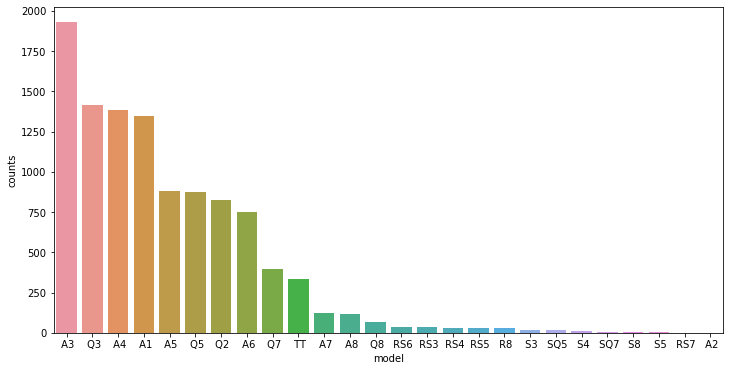

In [7]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 6)

amount_per_model=cars_df["model"].value_counts().rename_axis('model').reset_index(name='counts')

sns.barplot(x="model", y="counts",data=amount_per_model)




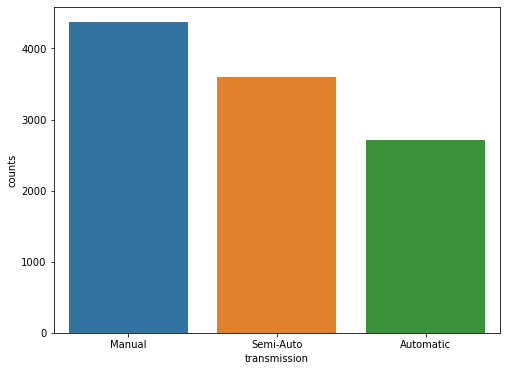

In [8]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

amount_per_transmission=cars_df["transmission"].value_counts().rename_axis('transmission').reset_index(name='counts')

sns.barplot(x="transmission", y="counts",data=amount_per_transmission)

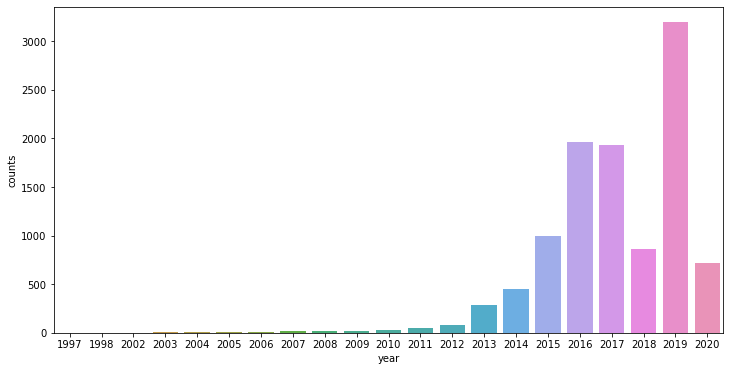

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
amount_per_year=cars_df["year"].value_counts().rename_axis('year').reset_index(name='counts')
sns.barplot(x="year", y="counts",data=amount_per_year)

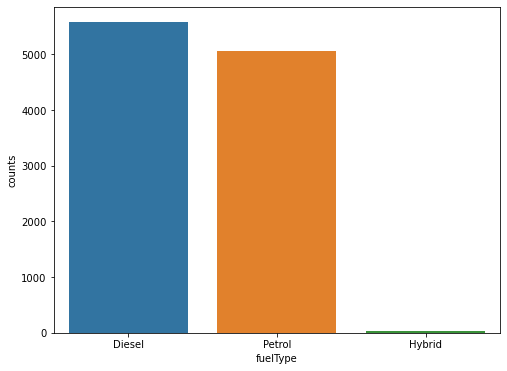

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
amount_per_fuel_type=cars_df["fuelType"].value_counts().rename_axis('fuelType').reset_index(name='counts')
sns.barplot(x="fuelType", y="counts",data=amount_per_fuel_type)

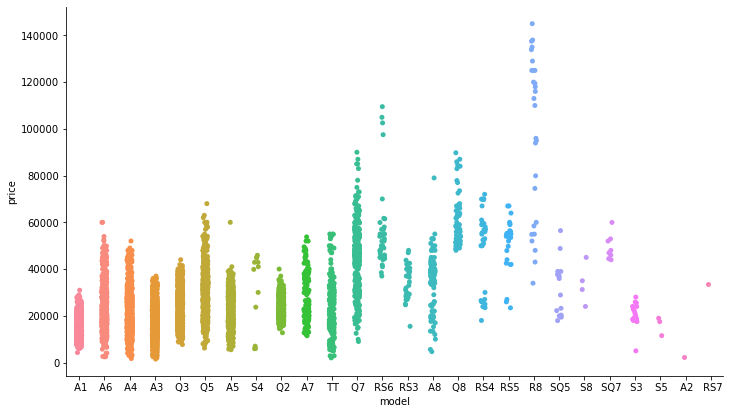

In [11]:
cars_cat_plot = sns.catplot(x="model", y="price" ,data=cars_df)
cars_cat_plot.fig.set_figwidth(12)
cars_cat_plot.fig.set_figheight(6)


In [12]:
cars_df[["model","price"]].groupby("model").mean().reset_index().sort_values('price', ascending=False)

,model,price
13,R8,97652.214286
12,Q8,60115.014493
17,RS6,55963.871795
16,RS5,51265.206897
15,RS4,50151.612903
24,SQ7,49269.000000
11,Q7,44788.319899
7,A8,34981.847458
14,RS3,34050.515152
22,S8,33807.750000


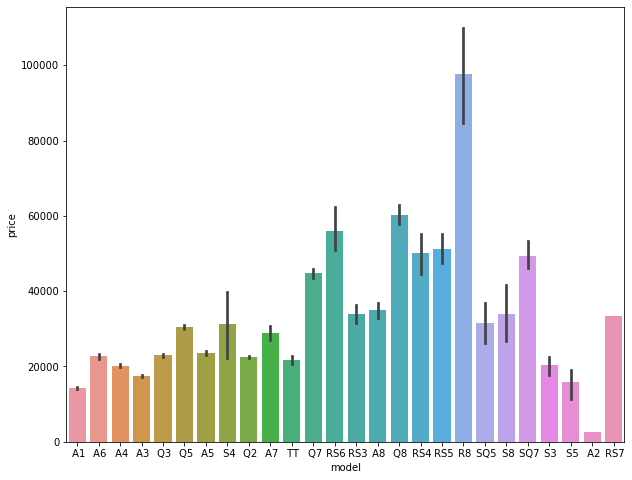

In [13]:
fig = plt.gcf()
fig.set_size_inches(10, 8)

sns.barplot(x="model", y="price", data=cars_df)
plt.show()


<h3>Average price per model - we can see that the R8 is much more expensive than the other models </h3>

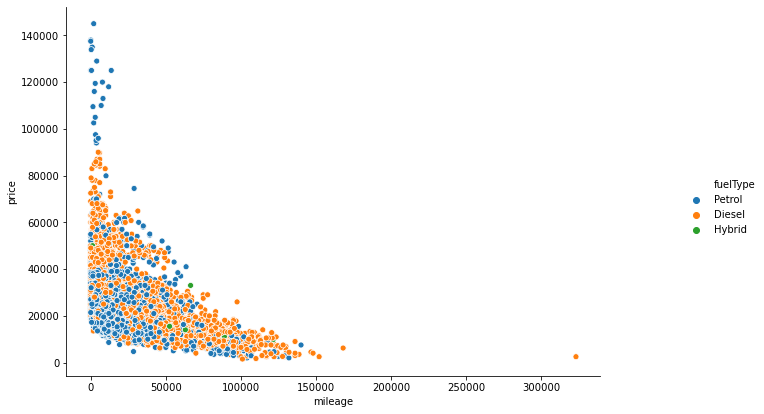

In [14]:
mileage_price_rel = sns.relplot(x="mileage", y="price", hue="fuelType" ,data=cars_df)
mileage_price_rel.fig.set_figwidth(12)
mileage_price_rel.fig.set_figheight(6)


There are outliers when it comes to mileage and that is something that affects the data during scaling. 

0.9069178852643419


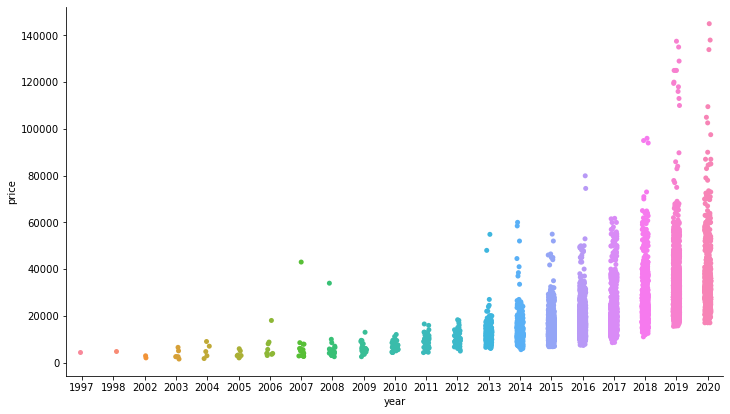

In [15]:
cars_cat_plot_price_year = sns.catplot(x="year", y="price" ,data=cars_df)
cars_cat_plot_price_year.fig.set_figwidth(12)
cars_cat_plot_price_year.fig.set_figheight(6)

print(cars_df.loc[cars_df["year"]>2014].size/cars_df.size)

most of the cars sold are from the year 2014 onwards -  we can interpret that from the density of the graph.
I have decided to create a new column that contains that age of the car compared to 2021



In [16]:
cars_df["age_of_car"] = 2021 - cars_df["year"]
cars_df = cars_df.drop(columns = ["year"])
cars_df.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
8524,A1,14450,Manual,47108,Petrol,150,56.5,1.4,4
2527,A1,13495,Manual,26525,Petrol,30,58.9,1.4,6
573,A1,13995,Manual,8577,Petrol,30,55.4,1.4,5
6276,A3,14695,Manual,17856,Petrol,20,60.1,1.4,5
8509,A6,14000,Automatic,114520,Diesel,30,64.2,2.0,6
4652,Q5,67990,Semi-Auto,6000,Diesel,145,32.5,3.0,2
5279,A1,16490,Semi-Auto,16141,Petrol,30,70.6,1.4,5
4936,A5,33000,Semi-Auto,6000,Petrol,145,39.8,2.0,1
4300,A5,35000,Semi-Auto,4500,Diesel,145,45.6,2.0,1
1493,Q5,31498,Semi-Auto,28,Petrol,145,33.2,2.0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121b99be0>,
      dtype=object)

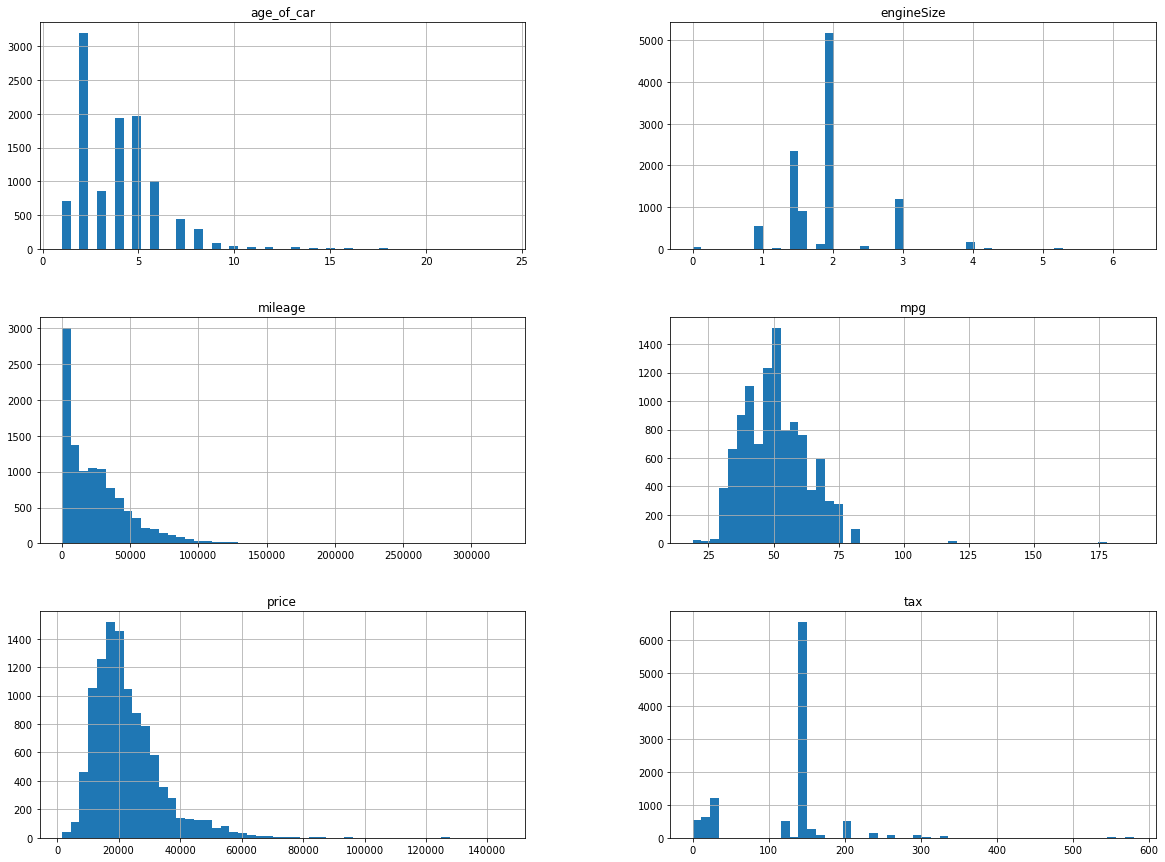

In [17]:
cars_df.hist(bins=50, figsize=(20,15))

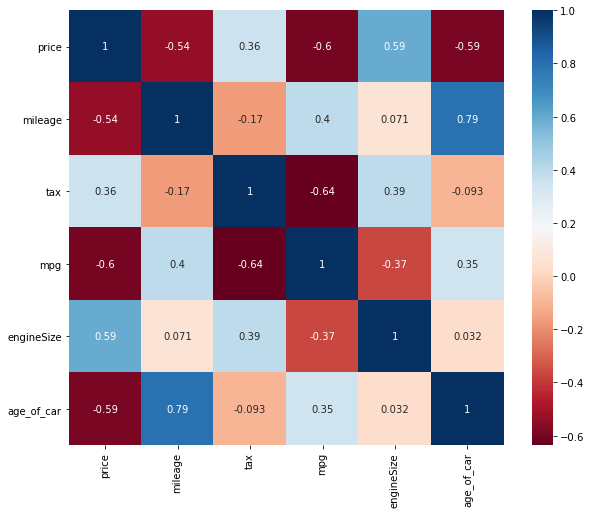

In [18]:
colormap = plt.cm.RdBu
sns.heatmap(cars_df.corr(), annot=True, cmap=colormap,square=True )
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

# Preparing the data for the models

## Dealing with categorical data

In [19]:
cars_df_with_dummies = pd.get_dummies(cars_df)
cars_df_with_dummies

,price,mileage,tax,mpg,engineSize,age_of_car,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,12500,15735,150,55.4,1.4,4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,16500,36203,20,64.2,2.0,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11000,29946,30,55.4,1.4,5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,16800,25952,145,67.3,2.0,4,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,17300,1998,145,49.6,1.0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,16999,4018,145,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10664,16999,1978,150,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10665,17199,609,150,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10666,19499,8646,150,47.9,1.4,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Now I will apply the scaler on the data 

I am using the standard scaler since there might are outliers in the features

In [20]:
std_scaler = StandardScaler()

price_label = cars_df_with_dummies['price']
cars_without_price = cars_df_with_dummies.drop(['price'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(cars_without_price,price_label,test_size=0.2,random_state=0)


X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)


### The precision of the model with respect to the number of features

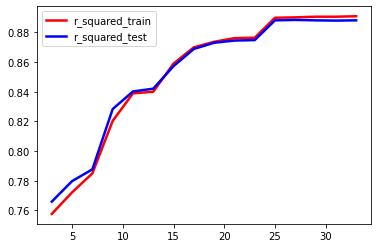

In [21]:
column_names = cars_df_with_dummies.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []


for k in range(3, 35, 2): # From 3 to 35 variables (every single one)
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    

sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full', color='red', linewidth=2.5, label="r_squared_train")
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full', color='blue', linewidth=2.5, label="r_squared_test")
plt.show()

In [22]:
selector = SelectKBest(f_regression, k = 27)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ A1',
       'model_ A2', 'model_ A3', 'model_ A4', 'model_ A7', 'model_ A8',
       'model_ Q5', 'model_ Q7', 'model_ Q8', 'model_ R8', 'model_ RS3',
       'model_ RS4', 'model_ RS5', 'model_ RS6', 'model_ SQ5', 'model_ SQ7',
       'model_ TT', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Petrol'],
      dtype='object')

# Training models

## Linear regression

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_transformed, y_train)
initial_prediction = linear_reg.predict(X_test_transformed)


print(linear_reg.score(X_test_transformed,y_test))
print (mean_squared_error(y_test,initial_prediction, squared=False))


0.8884683995808298
3914.8726371732746


In [24]:
linear_reg_scores = cross_val_score(LinearRegression(),X_train_transformed, y_train,cv=5,scoring="neg_mean_squared_error", )

print(linear_reg_scores)
np.sqrt(-linear_reg_scores.mean())

[-16147302.13408125 -14081285.8055505  -16608368.45682925
 -13860223.744855   -16906439.57217302]


3939.6350012022435

In [25]:
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train_transformed, y_train,cv=5,scoring="r2")

linear_reg_scores_r2
linear_reg_scores_r2.mean()

0.8867681278333484

In [26]:
results = {}
results["predicted"] = initial_prediction.round(2)
results["original"] = y_test

pd.DataFrame.from_dict(results)

,predicted,original
2049,12761.21,14998
5609,27357.31,21950
7638,30334.59,28990
1603,24991.43,25489
5953,30374.33,30950
...,...,...
49,30689.61,23700
9999,18523.24,18000
2580,48967.82,45995
4139,30371.85,30500


## RandomForestRegressor

In [27]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_transformed, y_train)

print(forest_reg.score(X_test_transformed,y_test))


0.9569501961754554


In [28]:
forest_reg_scores = cross_val_score(RandomForestRegressor(),X_train_transformed, y_train,cv=5,scoring="neg_mean_squared_error")

print(forest_reg_scores)
np.sqrt(-forest_reg_scores.mean())

[-6246011.15587664 -7087657.72834975 -6134157.66222424 -4837005.75949248
 -6299298.54849261]


2474.0303496293536

In [29]:
forest_reg_scores_r2 = cross_val_score(RandomForestRegressor(),X_train_transformed, y_train,cv=5,scoring="r2")

forest_reg_scores_r2
forest_reg_scores_r2.mean()

0.9551795902686608

In [30]:
forest_reg_param_grid = [
    {
     'n_estimators': [10,100,150],
     'min_samples_leaf': [1,4],
     'min_samples_split': [2,4,6]
    }
]

grid_search_forest_reg = GridSearchCV(
    RandomForestRegressor(),
    forest_reg_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=2
)
grid_search_forest_reg.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid=[{'min_samples_leaf': [1, 4],
                          'min_samples_split': [2, 4, 6],
                          'n_estimators': [10, 100, 150]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
print(np.sqrt(-grid_search_forest_reg.best_score_))
grid_search_forest_reg.best_params_

2416.3170691480577


{'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}

In [32]:
best_forest_reg = grid_search_forest_reg.best_estimator_

best_forest_reg.fit(X_train_transformed, y_train)

print(best_forest_reg.score(X_test_transformed,y_test))

forest_predictions = best_forest_reg.predict(X_test_transformed)

print (mean_squared_error(y_test,forest_predictions, squared=False))


0.9556619495164164
2468.351289167248


In [33]:
tree_results = {}
tree_results["predicted"] = forest_predictions.round(2)
tree_results["original"] = y_test


pd.DataFrame.from_dict(tree_results)

,predicted,original
2049,14553.32,14998
5609,23460.12,21950
7638,27217.21,28990
1603,26560.01,25489
5953,32336.99,30950
...,...,...
49,30465.32,23700
9999,17369.54,18000
2580,46982.39,45995
4139,31261.03,30500


## DummyRegressor

In [34]:
dummy_regr_mean = DummyRegressor(strategy="mean")
dummy_regr_mean.fit(X_train_transformed, y_train)

print (mean_squared_error(y_test,dummy_regr_mean.predict(X_test_transformed), squared=False))


11723.082998767319


In [35]:
dummy_regr_median = DummyRegressor(strategy="median")
dummy_regr_median.fit(X_train_transformed, y_train)

print (mean_squared_error(y_test,dummy_regr_median.predict(X_test_transformed), squared=False))

12082.975211707137


# conclusions

1. both the LinearRegression and the RandomForestRegressor perform much better compared to the dummy regressor.
2. we can see that the RandomForestRegressor has the best performance will.
